In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f=np.polynomial.Polynomial([-3, -3, 1,1])
f_dash=np.polynomial.Polynomial([-3, +2, 3])
roots=np.polynomial.polynomial.Polynomial.roots(f)
print("exact roots are",roots)

exact roots are [-1.73205081 -1.          1.73205081]


In [7]:
# 1A

epsilon=1e-10
p0=2
x_n1=0;
x_n=p0
x_at_iter=[];err_iter=[]
max_iter=1000
n=[];x_exact=np.sqrt(3);
er_rat1=[0];er_rat2=[0];er_rat3=[0];
for i in range (1, max_iter):
    if (f_dash(x_n)==0):
              break
    else:
        x_n1=x_n-(f(x_n)/f_dash(x_n))
        
    if (abs(x_n1-x_n)<=epsilon):             #checkpoint
            break
    else:
        x_n=x_n1
        x_at_iter.append(x_n)
        err_iter.append(abs(x_exact-x_n))
        n.append(i)
for i in range (1,len(err_iter)):
    er_rat1.append(err_iter[i]/err_iter[i-1])
    er_rat2.append(err_iter[i]/(err_iter[i-1]**2))
    er_rat3.append(err_iter[i]/err_iter[i-1]**3)
dict1={'iteration':n,'absolute_error':err_iter,'error_ratio_1':er_rat1,'error_ratio_2':er_rat2,
       'error_ratio_3':er_rat3}
df2=pd.DataFrame(dict1)
df2=df2.round(9)
# df2.to_csv('NR_1_1.csv')
df2

,iteration,absolute_error,error_ratio_1,error_ratio_2,error_ratio_3
0,1,3.717996e-02,0.000000e+00,0.000000,0.000000e+00
1,2,8.730030e-04,2.348047e-02,0.631536,1.698591e+01
2,3,4.990000e-07,5.710640e-04,0.654137,7.492955e+02
3,4,0.000000e+00,3.260000e-07,0.654853,1.313542e+06


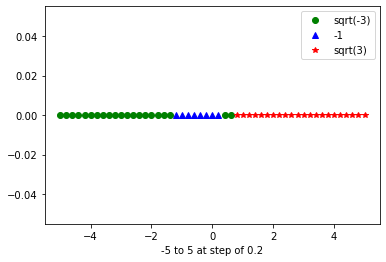

In [8]:
# 1B

p=np.linspace(-5,5,51,endpoint=True)
n1=0
ls=list()
iter=[]
for po in p:
    n=0
    x_n1=0;
    x_n=po
    for i in range (0, max_iter):
        if (f_dash(x_n)==0):
                  break
        else:
            x_n1=x_n-(f(x_n)/f_dash(x_n))

        if (abs(x_n1-x_n)<=epsilon*abs(x_n1)):
                ls.append([po,round(x_n1,8)])
                break
        else:
            x_n=x_n1
df=pd.DataFrame(ls,columns=['Starting_Point','Root_Reached'])

r1_x=[];r2_x=[];r3_x=[];
r1_y=[];r2_y=[];r3_y=[];
for i in range (len(df)):
    if round(df.iloc[i,1],2)==-1.73:
        r1_x.append(df.iloc[i,0])
        r1_y.append(0)
    elif round(df.iloc[i,1],2)==-1.:
        r2_x.append(df.iloc[i,0])
        r2_y.append(0)
    elif round(df.iloc[i,1],2)==1.73:
        r3_x.append(df.iloc[i,0])
        r3_y.append(0)
        
plt.plot(r1_x, r1_y,linestyle='',marker='o', color='green',label='sqrt(-3)')
plt.plot(r2_x, r2_y,linestyle='',marker='^', color='blue',label='-1')
plt.plot(r3_x, r3_y,linestyle='',marker='*', color='red',label='sqrt(3)')        
plt.xlabel('-5 to 5 at step of 0.2')
plt.legend()